# Medical Costs

## Dataset

##### Imports

In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

##### Load data

Hieronder kun je de eerste vijf rijen van de dataset bekijken. Er is een kolom dat charges heet. Dit is onze label. Dit is een continious waarde.

In [51]:
data = pd.read_csv('insurance.csv')

data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Probleem

Voordat we naar de ziekenhuis gaan om onze hart te laten controleren voor ziektes ([Heart Disease](https://gitlab.fdmci.hva.nl/ozcana3/logboek-ai/-/blob/main/Machine%20Learning/heart_disease.ipynb)), moeten we even een verzekering afsluiten. Als we dit niet zouden doen, zouden de kosten voor medische onderzoek misschien wel hoog kunnen zijn (Americaaa).

Daarom lijkt het me even handig om te berekenen wat de kosten voor het afsluiten van een verzekering zou zijn (medisch gericht). Berekenen? Hoe bereken je dat nou weer? Help! Ik kan niet rekenen! 

Om je moeite te besparen, wordt er in dit verslag een AI model gemaakt die voor ons de verzekering kan voorspellen. Zo zouden we dit kunnen gebruiken voor meerdere mensen zonder zelf iets te berekenen.

<br>

**Wat is het probleem?**

We willen dus voorspellen hoeveel het sluiten van een verzekering zou kosten.

<br>

**Welke labels heb je?**

Er is een kolom genaamd 'charges'. Dit is een kolom met waardes van getallen. Het is dus een regressieprobleem. 

<br>

**Dimensies dataset**

In [52]:
data.shape

(1338, 7)

**Soorten data/features**

In [53]:
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

<mark>Insights<mark>

- De dataset bevat 1338 rijen en 7 kolommen
- Er zijn verschillende type datas. 3 objecten (strings), 4 getallen

In [54]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


<mark>Insights<mark>

- De meesten zijn tussen de 27 en 51 jaar oud
- De gemiddelde BMI is afgerond 31, wat aanduid op obesitas. Misschien dat er een sterke correlatie tussen de twee zijn?
- een BMI van 53 is wel erg hoog. Een persoon met een BMI van 35 heeft al extreem obesitas. Wat is 53 dan? Een uitsmijter misschien?
- De standaardafwijking van age is wel groot. Er zijn dus best veel verschillenden met verschillende leeftijden.

In [55]:
data.describe(include='object')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


**Insights**
- Sex en smoker bevatten beide twee unieke waardes. Booleans, dus. Dit moeten we omzetten.

## Voorspelling

**Welke classifier zal het beste zijn en waarom?**

Persoonlijk denk ik dat KNN of SVR het beste resultaat zal geven. Ik verwacht namelijk dat dit geen mooie lineare probleem zal zijn en hierdoor valt linear regression al weg. SVM staat bekend om zijn hoge accuraatheid. KNN kan hiervoor ook wel goed zijn, aangezien er veel factoren zijn die gegroepeerd kunnen worden. Denk aan smokers die hoogstwaarschijnlijk meer moeten betalen dan niet smokers. KNN kan het denk ik wel hier goed mee doen. SVR heb ik nooit mee gewerkt, maar ben er wel beniewd naar. Aangezien ik er niet veel van afweet, heb ik op internet gezocht naar voorbeelden. Met de juiste hyperparameters denk ik dat SVM goed kan werken. 

<br>

**Welke hyperparmeters zijn relevant en waarom?**

Voor SVM denk ik dat C, gamma en kernel relevant zijn. 
- C: Om sensitiviteit voor noise te verlagen wordt soft margin gebruikt, zodat het niet overfit wordt op trainingsdata. Om het niet overfit te krijgen, wordt er dus een zogenoemde decision boundry lijn getekend. C helpt ermee om deze te bepalen.
- Kernels zijn functies die helpen om problemen te oplossen.
- Voor een lineare kernel is alleen C van belang. Vaak wordt ook de RBF kernel gebruikt. Hier speelt de gamma een rol bij. 

Voor KNN is n_neighbors belangrijk, aangezien n_neigbors veel invloed heeft op de uitkomst. Als je bijvoorbeeld een n_neigbor waarde van 3 neemt kan dit verschillen met als je een n_neighbor waarde van 7 neemt.

## Methoden

**Welke preprocessing stappen zijn nodig?**
- Checken of er nan waardes zijn
- Bekijken of er duplicaties zijn
- Categorisch veranderen naar numeriek
- outliers eruithalen
- feature selection

<br>

**Welke classifiers ga je vergelijken?**
- Linear regression
- Decision Tree
- KNN
- Support Vector Regressor

<br>

**Welke performance metric is passend?**

Dit is een regressie probleem die een continious waarde probeert te voorspellen. Bij regressieproblemen is het gebruik van R2 geschikt als metrics. 

##### Duplicates / NaN-waardes

In [56]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [57]:
data.duplicated().sum()

1

<mark>Insights<mark>
- Er zijn geen lege cellen in de dataset
- Er is 1 kolom dat gedupliceerd is.

In [58]:
data.drop_duplicates(inplace=True)
data.shape

(1337, 7)

##### Categorisch -> numeriek

In [59]:
categorical_features = ['sex','smoker']

from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

data[categorical_features] = data[categorical_features].apply(lb.fit_transform)

# One Hot Encoding
data = pd.get_dummies(columns=['region'], data=data)

data.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


##### Outliers

In [60]:
import plotly.express as px

fig = px.scatter_matrix(data,
    dimensions=["age", 'sex', 'bmi', 'children', 'smoker', 'charges'],
    color="charges", height=800)
fig.show()

<mark>Insights<mark>

- Tussen de 30 en 40 bmi zijn de charges het hoogst. Daarna zakken de charges weer.
- charges zijn zeker hoger als iemand rookt. Er zijn ook meer smokers dan niet smokers
- charges stijgt een beetje naarmate je ouder bent. Er is dus wel degelijke relatie.
- sex lijkt niet echt invloed te hebben op de kosten.
- children lijkt niet echt invloed te hebben op de kosten.

##### Charges

<AxesSubplot:xlabel='charges', ylabel='Count'>

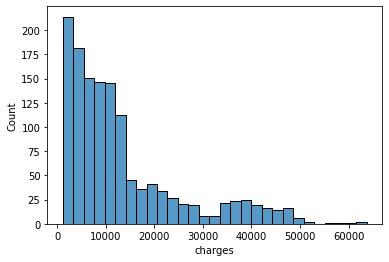

In [55]:
sns.histplot(data['charges'])

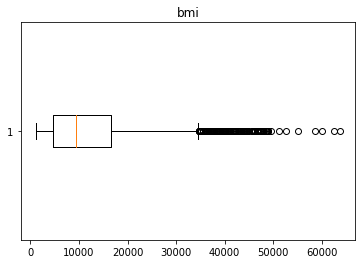

In [58]:
plt.boxplot(data['charges'], vert=False)
plt.title('bmi')
plt.show()

<mark>Insights<mark>

- De charges zakken wel snel. De meesten betalen tussen de 1000 en 10000. Daarna zakt het dramatisch.
- De outliers liggen echt na de 50000

##### Age

<AxesSubplot:xlabel='age', ylabel='Count'>

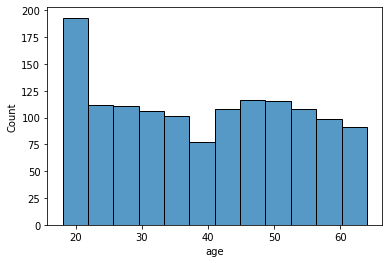

In [56]:
sns.histplot(data['age'])

<mark>Insights<mark>

- Er zijn heel veel kolommen waarbij de leeftijd 20 is. Veel meer dan de rest
- Er zijn weinig 40 jaars.

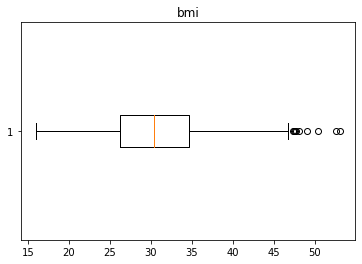

In [57]:
plt.boxplot(data['bmi'], vert=False)
plt.title('bmi')
plt.show()

<mark>Insights</mark>
- Er zijn inderdaad wat uitschieters. Ik beschouw 50 of er boven als uitschieter.

In [18]:
data = data[data['bmi'] <= 50]

##### Feature selection

<AxesSubplot:>

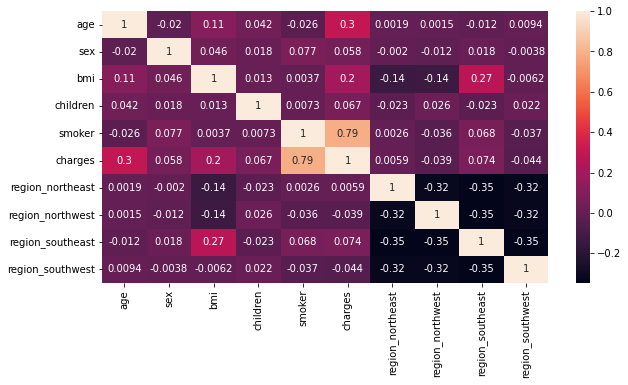

In [66]:
plt.figure(figsize=(10, 5))
sns.heatmap(data.corr(),annot=True)

<mark>Insights<mark>

- Age is redelijk sterk gerelateerd aan charges
- BMI is redelijk sterk gerelateerd aan charges
- Smoker is zeer sterk gerelateerd aan charges
- region, children en sex kunnen eruit.
- De features hebben niet echt een correlatie met elkaar.

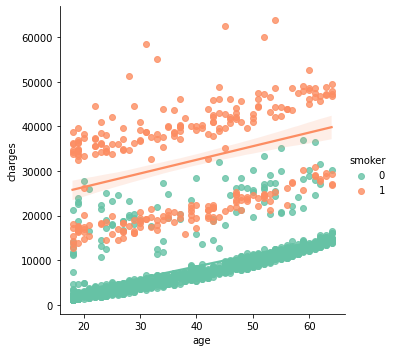

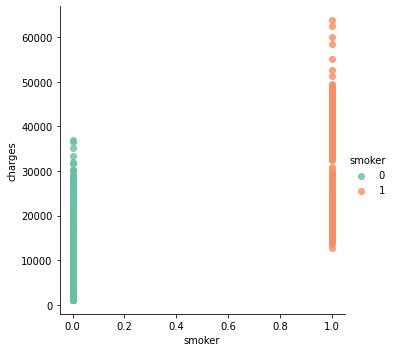

In [68]:
sns.lmplot(x = 'age', y = 'charges' , hue = 'smoker', data = data, palette = 'Set2')
sns.lmplot(x = 'smoker', y = 'charges', hue="smoker" ,data = data, palette = 'Set2')

<mark>Insights<mark>

- Charges zijn duidelijk hoger als iemand rookt.

<AxesSubplot:xlabel='bmi', ylabel='Count'>

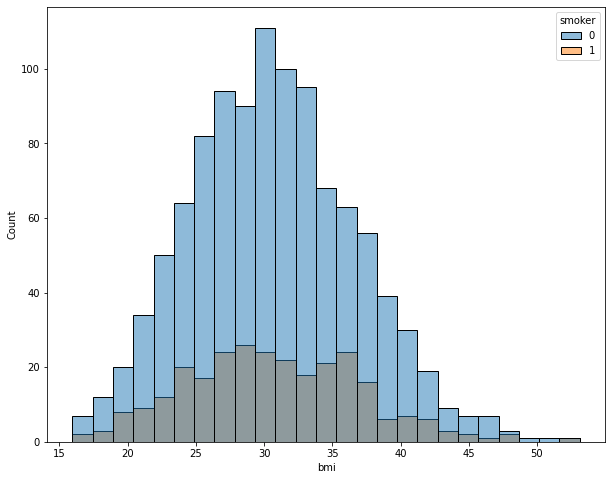

In [91]:
plt.figure(figsize=(10,8))
sns.histplot(data,x='bmi',multiple='layer',hue = 'smoker')

<mark>Insights<mark>

- Er is nog wel degelijk relatie met BMI en smoker

<br>


Aangezien de features voor de rest niet echt een correlatie met elkaar hebben, verwijderen we degene die zwak zijn gerelateerd aan charges.

In [67]:
data = data.drop(["sex", "children", "region_northeast", 'region_northwest', 'region_southeast', 'region_southwest'], axis=1)
data.head()

,age,bmi,smoker,charges
0,19,27.900,1,16884.92400
1,18,33.770,0,1725.55230
2,28,33.000,0,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520


<mark>Insights<mark>

- BMI ziet er normaal verdeeld uit
- De meesten hebben een BMI tussen de 25 en 35.

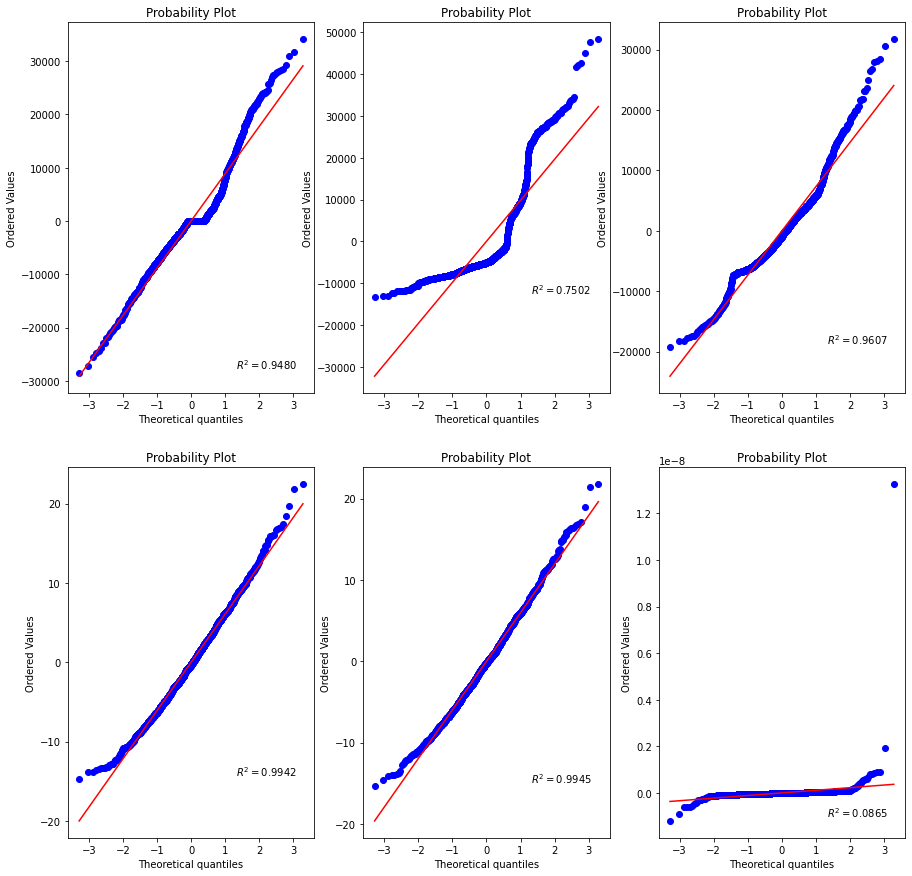

In [112]:
import statsmodels.formula.api as smf
from scipy import stats

fig, axes = plt.subplots(2, 3, figsize=(15,15))

reg_test = smf.ols("charges ~ C(bmi)", data=data).fit()
normality_plot, stat = stats.probplot(reg_test.resid, plot=axes[0][0], rvalue=True)

reg_test = smf.ols("charges ~ C(age)", data=data).fit()
normality_plot, stat = stats.probplot(reg_test.resid, plot=axes[0][1], rvalue=True)

reg_test = smf.ols("charges ~ C(smoker)", data=data).fit()
normality_plot, stat = stats.probplot(reg_test.resid, plot=axes[0][2], rvalue=True)

reg_test = smf.ols("bmi ~ C(smoker)", data=data).fit()
normality_plot, stat = stats.probplot(reg_test.resid, plot=axes[1][0], rvalue=True)

reg_test = smf.ols("bmi ~ C(age)", data=data).fit()
normality_plot, stat = stats.probplot(reg_test.resid, plot=axes[1][1], rvalue=True)


reg_test = smf.ols("charges ~ C(charges)", data=data).fit()
normality_plot, stat = stats.probplot(reg_test.resid, plot=axes[1][2], rvalue=True)

plt.show()

Split data

In [70]:
X = data.drop(['charges'], axis=1)
y = data['charges']

Split de data tussen 75% train en 25% test

In [76]:
## Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [72]:
X_train.shape, X_test.shape

((1002, 3), (335, 3))

In [83]:
X_train_zscores = pd.DataFrame()
for col in X_train.columns:
    col_zscores = f"{col}_zscores"

    X_train_zscores[col_zscores] = (X_train[col] - X_train[col].mean())/X_train[col].std()

X_train_zscores


,age_zscores,bmi_zscores,smoker_zscores
1075,-0.515352,-0.200880,-0.500685
131,1.538282,-1.435159,-0.500685
15,-1.435946,-1.016649,-0.500685
825,1.750726,0.164499,-0.500685
1137,-0.940242,-1.404097,-0.500685
...,...,...,...
764,0.405242,-0.922647,-0.500685
836,-0.232092,0.111367,-0.500685
1217,-0.727797,1.057920,-0.500685
559,-1.435946,0.770194,-0.500685


In [80]:
from scipy.stats import zscore
zscore(X_train)

,age,bmi,smoker
1075,-0.515609,-0.200981,-0.500935
131,1.539050,-1.435875,-0.500935
15,-1.436663,-1.017156,-0.500935
825,1.751601,0.164581,-0.500935
1137,-0.940711,-1.404799,-0.500935
...,...,...,...
764,0.405445,-0.923108,-0.500935
836,-0.232208,0.111423,-0.500935
1217,-0.728160,1.058448,-0.500935
559,-1.436663,0.770579,-0.500935


In [89]:
possibly_outliers = False

for col in X_train_zscores:
    column_values = X_train_zscores[col]
    if all(y <= 3.5 for y in column_values) is False:
        possibly_outliers = True


possibly_outliers

True

<mark>Insights</mark>
- Hoogstwaarschijnlijk zijn er nog outliers, aangezien er er zelfs 3.5 standaardafwijkingen van de gemiddelde zijn. binnen 3 standaardafwijkingen is zo'n 99%. 

In [148]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler


sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_y.fit_transform(X_test)



**Insights**
- Veel hebben wel een lineaire verband. Neem bijvoorbeeld bmi met age. Die hebben een R^2 van 0.9945. Zeer sterk dus
- Charges is zelf niet linear. Zo zie je bij de laatste plot dat de R^2 maar 0.08 is. Erg zwak, dus geen lineare verband.

##### Classifiers

Als classifiers worden de volgende gebruikt:
- Liniaire Regression
- Decision Tree Regressor
- Support Vector Regressor

Om het resultaat te meten, wordt de R2 metrics gebruikt, omdat deze een goede metrics is voor regressie modellen.

In [149]:
def plot_r2_score(y_test, pred):
    plt.figure(figsize=(5,5))
    plt.xlabel("predicted label")
    plt.ylabel("actual label")
    plt.scatter(pred, y_test)
    plt.plot([0, 50000], [0,50000], color='red')
    plt.show()

##### Lineaire Resgressie

In [153]:
from sklearn.linear_model import LinearRegression
from time import time

lr = LinearRegression()
start = time()
lr.fit(X_train, y_train)
end = time()

lr_time = end - start
print('train time: ', lr_time)

train time:  0.0009429454803466797


In [154]:

lr_pred_train = lr.predict(X_train)
lr_pred_test = lr.predict(X_test)

lr_train_score = r2_score(y_train, lr_pred_train)
lr_test_score = r2_score(y_test, lr_pred_test)

print('R2 score train: ', lr_train_score)
print('R2 score test: ', lr_test_score)

R2 score train:  0.747999036002318
R2 score test:  0.741757022525657


De R2 voor de test is hoger dan de train. Dat is gek. Dit betekent dat de test set teveel lijkt op de train set. Dit kunnen we oplossen door de train_test_split opnieuw uit te voeren, maar ook door de n-fold cross validation toe te passen. Ik ga voor de tweede optie om meer te leren over crossvalidation

In [155]:
from sklearn.model_selection import cross_val_score

lr_train_score = cross_val_score(lr, X_train, y_train, cv=7).mean()
lr_test_score = cross_val_score(lr, X_test, y_test, cv=7).mean()

print('Cross validation score train: ', lr_train_score)
print('Cross validation score test: ', lr_test_score)

Cross validation score train:  0.7357733607849474
Cross validation score test:  0.719598940110834


Zonder hyperparameters: 
- Train: 0.74
- Test: 0.76
- train data lijkt te veel op test data?

Cross validation:
- Train: 0.74
- Test: 0.72
- underfit

M.b.v. crossvalidation hebben we gefixt dat de train en test data op elkaar lijken. De R2 score geeft een reele score. Het zou raar zijn als test data score beter is dan train data score.

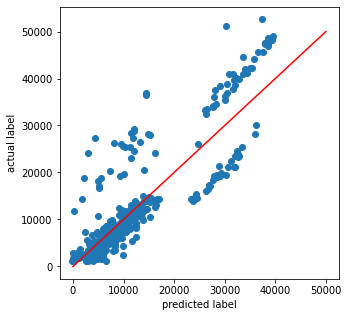

In [156]:
plot_r2_score(y_test, lr_pred_test)

**Insights**
- Aan het begin is de verspreiding redelijk klein. D.w.z. dat de punten dicht bij de lijn zijn. Toch zijn er ook wat uitsmijters.
- Na de 20000 lopen de punten echt weg van de lijn

##### DecisionTreeRegressor

In [158]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(max_depth=5, min_samples_leaf=5, min_samples_split=4, random_state=11)

start = time()
dtr.fit(X_train,y_train)
end = time()

dtr_time = end - start

print('train time: ', dtr_time)


train time:  0.0016930103302001953


**Insights**
- slomer dan lineare regressie

In [160]:
dtr_pred_train = dtr.predict(X_train)
dtr_pred_test = dtr.predict(X_test)

dtr_train_score = r2_score(y_train, dtr_pred_train)
dtr_test_score = r2_score(y_test, dtr_pred_test)

print('R2 Score train: ', dtr_train_score)
print('R2 Score test: ', dtr_test_score)

R2 Score train:  0.8770962502533276
R2 Score test:  0.8365806791677417


**Insights**

zonder hyperparameters:
- Train: 1.0
- Test: 0.7
- overfit

Params - max_depth=15
- Train: 0.99
- Test: 0.65
- overfit

params - max_depth=10
- Train: 0.97
- Test: 0.69
- overfit

params- max_depth=5
- Train: 0.88
- Test: 0.84
- prima


min_samples_leaf & min_samples_split geven alleen maar dezelfde scores

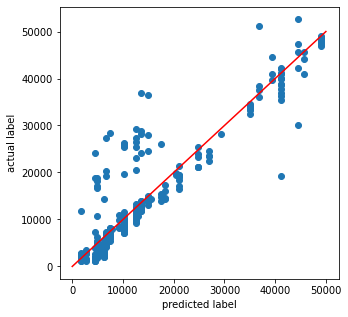

In [161]:
plot_r2_score(y_test, dtr_pred_test)

**Insights**
- De meeste punten zijn wel op de lijn of bijna erop.
- Niet heel veel verspreiding
- Lijkt op minder punten. Misschien dat er meer punten op elkaar zitten?

**Insights**
- Geldt hetzelfde als bij DTR.

##### KNeighborsRegressor

In [165]:
from sklearn.neighbors import KNeighborsRegressor

start = time()
knn = KNeighborsRegressor(n_neighbors=8)
end = time()

knn_time = end - start
knn.fit(X_train, y_train)
print('train_time: ', knn_time)

train_time:  4.100799560546875e-05


**Insights**
- Sneller dan de rest tot nu toe

In [166]:

knn_pred_train = knn.predict(X_train)
knn_pred_test = knn.predict(X_test)

knn_train_score = r2_score(y_train, knn_pred_train)
knn_test_score = r2_score(y_test, knn_pred_test)

print('R2 score train: ', knn_train_score)
print('R2 score test: ', knn_test_score)

R2 score train:  0.8722800421041532
R2 score test:  0.8404974301789316


**Insights**
3 neighbours:
- train: 0.87
- test: 0.85
- prima

5 neighbours:
- train: 0.88
- test: 0.83
- overfitting

4 neighbours:
- train: 0.89
- test: 0.83
- overfitting

8 neigours:
- train: 0.86
- test: 0.84
- prima, maar wel lager dan 3 neighbours



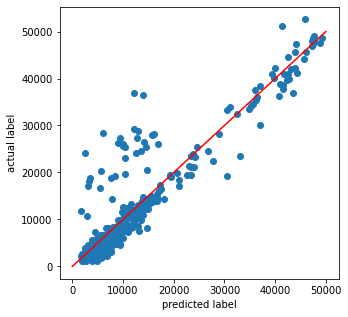

In [167]:
plot_r2_score(y_test, knn_pred_test)

**Insights**
- Begin is de verspredingsgrootte zeer klein. Wel meer onder dan boven de lijn. Boven de lijn is er meer verspreiding.
- Na de 25000 lijken er minder punten te zijn. Toch is de verspreiding hier ook niet groot.

In [40]:
from sklearn.model_selection import GridSearchCV

params = {'kernel' : ('linear','rbf', 'sigmoid'),'C' : [1,5,10, 100],'degree' : [3,8],'gamma' : ('auto','scale'), 'coef0' : [0.01,10,0.5]}


gsvr = GridSearchCV(SVR(), params, n_jobs=-1, scoring='r2')

gsvr.fit(X_train, y_train)

gsvr.best_estimator_


SVR(C=100, coef0=0.01, gamma='auto', kernel='linear')

In [168]:
svr = SVR(C=100, coef0=0.01, gamma='auto', kernel='linear')
start = time()
svr.fit(X_train, y_train)
end = time()

svr_time = end - start
print('Train time:', svr_time)

Train time: 0.02538919448852539


**Insights**
- Training duurt langer dan de rest

In [169]:
svr_pred_train = svr.predict(X_train)
svr_pred_test = svr.predict(X_test)

svr_train_score = r2_score(y_train, svr_pred_train)
svr_test_score = r2_score(y_test, svr_pred_test)

print('R2 score train: ', svr_train_score)
print('R2 score test: ', svr_test_score)

R2 score train:  0.6129346395704771
R2 score test:  0.5711666249515324


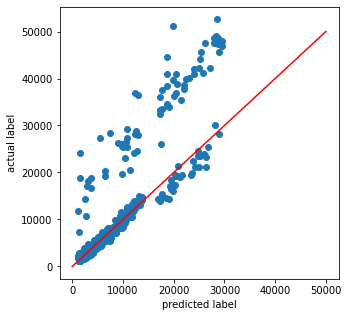

In [170]:
plot_r2_score(y_test, svr_pred_test)

**Insights**
- Lage R2 score
- underfit
- veel verspreiding van de normale lijn

### Resultaten

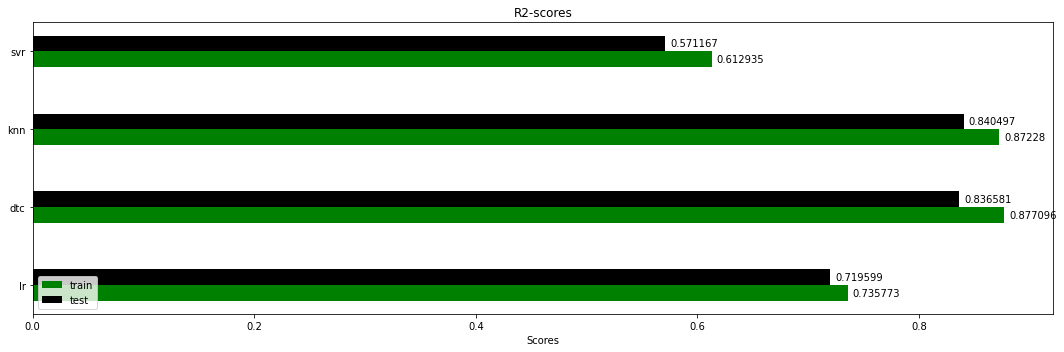

In [174]:
import numpy as np

train = [lr_train_score, dtr_train_score, knn_train_score, svr_train_score]
test = [lr_test_score, dtr_test_score, knn_test_score, svr_test_score]

models = ('lr', 'dtc', 'knn', 'svr')

x = np.arange(len(models))
width = 0.2

fig, ax = plt.subplots(figsize=(15,5))
train_bars = ax.barh(x - width/2, train, width, label='train', color='g')
test_bars = ax.barh(x + width/2, test, width, label='test', color='black')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Scores')
ax.set_title('R2-scores')
ax.set_yticks(x, models)
ax.legend(loc="lower left")

ax.bar_label(train_bars, padding=5)
ax.bar_label(test_bars, padding=5)

fig.tight_layout()

plt.show()

### Conclusie

Decision Tree en KNN zijn de beste classifiers voor dit probleem. KNN is net aan ietjes beter, maar ik verwacht dat Decision Tree beter kan als we een GridSeach toepassen. Nu is dat met de hand gedaan. Bij deze opdracht heb ik niet al te veel gelet op hyperparameters. 

Lineare regressie deed het niet al te best. Het een een R2 score van 0.77. Dit komt doordat de probleem ook niet echt een lineare verband heeft waarschijnlijk. 

SVR deed het niet al te best. Het heeft een R2 score van 0.63, maar het is wel underfit. Als we de juiste hyperparameters ervoor vinden, verwacht ik dat deze wel gaat stijgen. Toch had ik verwacht dat deze de beste resultaten zou weergeven. Dat is echte niet zo. Ik heb achteraf geleerd dat SVM vooral gebruikt wordt voor classificatie problemen. Regressie problemen kan ook, maar het shined het vooral bij classificatie.

Qua tijd was knn het snelst en svr het traagst. Knn had ik wel verwacht, aangezien het niet echt leert. Ik dacht zelf dat RFR trager zou zijn dan svr. Daarnaast was Lineare Regressie ook heel snel.

**Verbeteringen**

We kunnen de modellen verbeteren door:
- Een grotere dataset nemen. Deze dataset is wel klein.
- Een ander probleem nemen. De features hebben niet een al te sterke relatie met de label en de relatie is niet linear.
- Hyperparameters waardes verbeteren
- crossvalidatie toepassen


### Bronnen

- https://www.analyticsvidhya.com/blog/2020/03/support-vector-regression-tutorial-for-machine-learning/
- https://www.tutorialspoint.com/how-to-overplot-a-line-on-a-scatter-plot-in-python
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
- https://aegis4048.github.io/mutiple_linear_regression_and_visualization_in_python